# **5 FRAUD RISK INDEX CONSTRUCTION**


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("../data/master_banking_analysis_enriched.csv")

print("Dataset loaded. Shape:", df.shape)
df.head()
df.info()



Dataset loaded. Shape: (35, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  35 non-null     object 
 1   Loss_2018_19           35 non-null     float64
 2   Loss_2019_20           35 non-null     float64
 3   YoY_Change_2019_20     35 non-null     float64
 4   Loss_2020_21           35 non-null     float64
 5   YoY_Change_2020_21     34 non-null     float64
 6   Loss_2021_22           35 non-null     float64
 7   YoY_Change_2021_22     35 non-null     float64
 8   Loss_2022_23           35 non-null     float64
 9   YoY_Change_2022_23     33 non-null     float64
 10  Loss_2023_24           35 non-null     float64
 11  YoY_Change_2023_24     31 non-null     float64
 12  Loss_2024_25           35 non-null     float64
 13  YoY_Change_2024_25     34 non-null     float64
 14  Cumulative_Loss        35 no

In [13]:
df[df["State"] == "Kerala"][[
    "Bank_Branches_Total",
    "Population_Total",
    "Branches_per_Million",
    "Loss_per_Capita",
    "Loss_per_Branch"
]]

df.sort_values("Branches_per_Million", ascending=False)[
    ["State","Branches_per_Million"]
]



,State,Branches_per_Million
7,DADRA AND NAGAR HAVELI AND DAMAN AND DIU,16719.073549
11,HIMACHAL PRADESH,14161.335548
20,MEGHALAYA,3503.325012
22,NAGALAND,2536.820249
15,KERALA,2518.166905
33,UTTARAKHAND,2003.883924
3,ASSAM,1871.108447
24,ODISHA,1855.666258
31,TRIPURA,1398.590901
26,PUNJAB,1364.336856


In [14]:
df[['State', 'CAGR']].sort_values('CAGR', ascending=False)


,State,CAGR
31,TRIPURA,162.208778
14,KARNATAKA,52.561527
32,UTTAR PRADESH,33.613081
1,ANDHRA PRADESH,31.340877
26,PUNJAB,30.924075
30,TELANGANA,24.517921
12,JAMMU AND KASHMIR,23.219093
25,PUDUCHERRY,18.720670
20,MEGHALAYA,18.720670
9,GUJARAT,10.410443


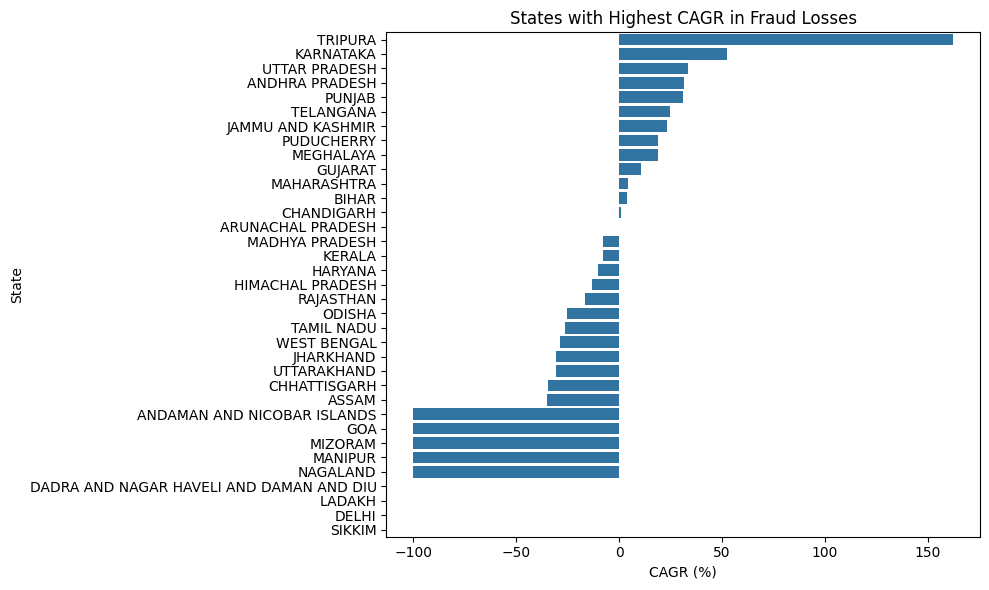

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sorted = df.sort_values('CAGR', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=df_sorted, x='CAGR', y='State')
plt.title("States with Highest CAGR in Fraud Losses")
plt.xlabel("CAGR (%)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


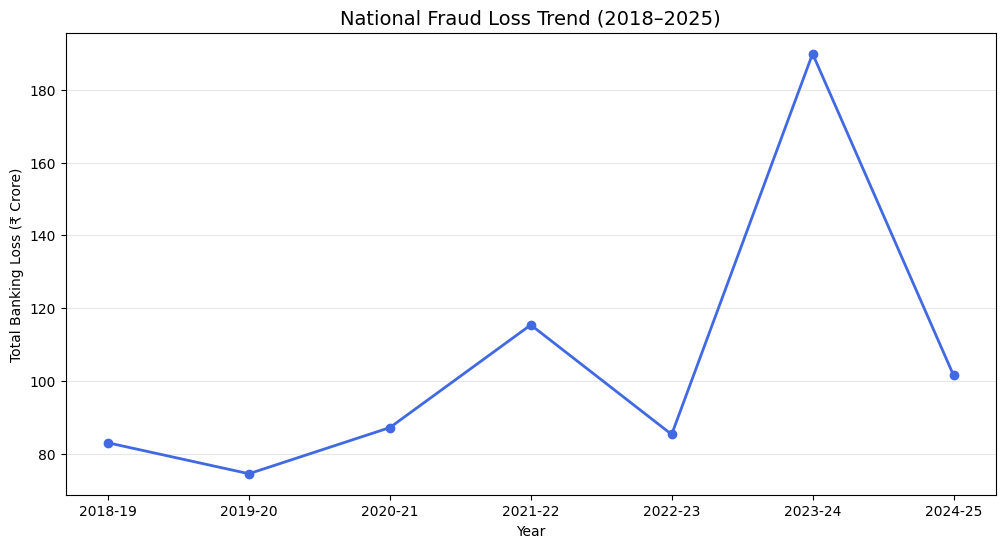

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) Select ONLY yearly loss columns
year_loss_cols = [
    'Loss_2018_19',
    'Loss_2019_20',
    'Loss_2020_21',
    'Loss_2021_22',
    'Loss_2022_23',
    'Loss_2023_24',
    'Loss_2024_25'
]

# 2) National total for each year
total_loss = df[year_loss_cols].sum(axis=0)

# 3) Clean x-label names
x_labels = [c.replace("Loss_", "").replace("_", "-") for c in year_loss_cols]

# 4) Plot
plt.figure(figsize=(12,6))
plt.plot(x_labels, total_loss.values, marker='o', linewidth=2, color='royalblue')

plt.title("National Fraud Loss Trend (2018–2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Banking Loss (₹ Crore)")
plt.grid(axis='y', alpha=0.3)

plt.show()


In [11]:
# Sort states by highest increase from 2022-23 to 2023-24
df['YoY_2023_24'] = df['Loss_2023_24'] - df['Loss_2022_23']
df_spike = df[['State', 'Loss_2022_23', 'Loss_2023_24', 'YoY_2023_24']]

# Top contributing states
df_spike.sort_values('YoY_2023_24', ascending=False).head(10)


,State,Loss_2022_23,Loss_2023_24,YoY_2023_24
18,MAHARASHTRA,13.28,42.54,29.26
15,KERALA,2.62,30.42,27.80
32,UTTAR PRADESH,9.56,29.23,19.67
10,HARYANA,13.01,29.57,16.56
29,TAMIL NADU,5.18,10.26,5.08
9,GUJARAT,3.32,7.73,4.41
14,KARNATAKA,3.51,6.61,3.10
17,MADHYA PRADESH,0.95,2.57,1.62
31,TRIPURA,0.00,1.23,1.23
13,JHARKHAND,0.08,1.16,1.08


C:\Users\KRISTINE\AppData\Local\Temp\ipykernel_24624\3844573846.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Risk Group")


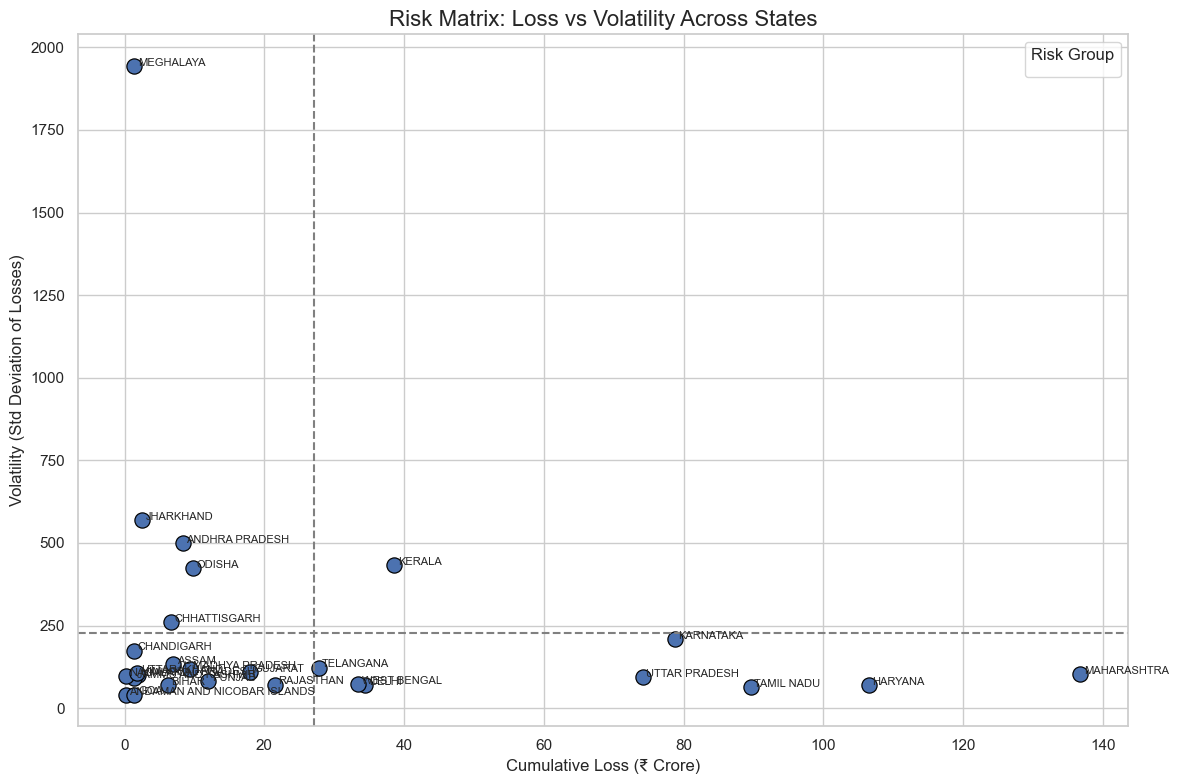

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create df_lossvol containing needed columns
df_lossvol = df[['State', 'Cumulative_Loss', 'Volatility']].dropna()

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(
    data=df_lossvol,
    x='Cumulative_Loss',
    y='Volatility',
    s=120,
    edgecolor='black'
)

# Annotate states
for _, row in df_lossvol.iterrows():
    plt.text(row['Cumulative_Loss'] + 0.5,
             row['Volatility'] + 0.5,
             row['State'],
             fontsize=8)

# Calculate and draw quadrant lines
mean_loss = df_lossvol['Cumulative_Loss'].mean()
mean_vol  = df_lossvol['Volatility'].mean()

plt.axvline(mean_loss, color='gray', linestyle='--')
plt.axhline(mean_vol, color='gray', linestyle='--')

# Labels
plt.title("Risk Matrix: Loss vs Volatility Across States", fontsize=16)
plt.xlabel("Cumulative Loss (₹ Crore)", fontsize=12)
plt.ylabel("Volatility (Std Deviation of Losses)", fontsize=12)

plt.legend(title="Risk Group")
plt.tight_layout()
plt.show()


In [20]:
corr = df['Literacy_Rate_Percent'].corr(df['Cumulative_Loss'])
corr


np.float64(-0.1108488602078867)

In [21]:
from scipy.stats import spearmanr
spearmanr(df['Literacy_Rate_Percent'], df['Cumulative_Loss'], nan_policy='omit')


SignificanceResult(statistic=np.float64(-0.34157618967966785), pvalue=np.float64(0.044615639000458514))

In [26]:
# Select relevant engineered features for Fraud Risk Index
fraud_features = df[[
    "State",
    "Loss_per_Capita",
    "Loss_2022_23_pct",
    "Loss_per_Branch",
    "Volatility",
    "CAGR"
]].copy()

fraud_features.head()


,State,Loss_per_Capita,Loss_2022_23_pct,Loss_per_Branch,Volatility,CAGR
0,ANDAMAN AND NICOBAR ISLANDS,1.789122e-06,0.000000,0.001856,40.554015,-100.000000
1,ANDHRA PRADESH,4.562060e-07,0.000253,0.001055,500.145323,31.340877
2,ARUNACHAL PRADESH,3.252087e-07,0.000000,0.001456,NaN,0.000000
3,ASSAM,5.010229e-06,0.000052,0.002678,133.407604,-35.194623
4,BIHAR,9.159260e-07,0.000161,0.000779,68.787467,3.584569


In [27]:
fraud_features.isna().sum()


State               0
Loss_per_Capita     1
Loss_2022_23_pct    0
Loss_per_Branch     1
Volatility          8
CAGR                4
dtype: int64

In [28]:
fraud_features = fraud_features.fillna(0)


In [29]:
scaler = StandardScaler()

scaled = scaler.fit_transform(
    fraud_features.drop(columns=["State"])
)

df_scaled = pd.DataFrame(
    scaled,
    columns=[
        "Loss_per_Capita_z",
        "Loss_to_GSDP_z",
        "Loss_per_Branch_z",
        "Volatility_z",
        "CAGR_z"
    ]
)

df_scaled["State"] = fraud_features["State"]

df_scaled = df_scaled[["State"] + [col for col in df_scaled.columns if col != "State"]]

df_scaled.head()

,State,Loss_per_Capita_z,Loss_to_GSDP_z,Loss_per_Branch_z,Volatility_z,CAGR_z
0,ANDAMAN AND NICOBAR ISLANDS,-0.413302,-0.735462,-0.274483,-0.404994,-1.796544
1,ANDHRA PRADESH,-0.701056,0.177794,-0.483549,0.966234,0.826855
2,ARUNACHAL PRADESH,-0.729336,-0.735462,-0.378793,-0.525991,0.200853
3,ASSAM,0.282080,-0.547108,-0.059780,-0.127958,-0.502123
4,BIHAR,-0.601811,-0.155500,-0.555709,-0.320757,0.272451


In [30]:
df_scaled["Fraud_Risk_Index"] = df_scaled[
    [
        "Loss_per_Capita_z",
        "Loss_to_GSDP_z",
        "Loss_per_Branch_z",
        "Volatility_z",
        "CAGR_z"
    ]
].mean(axis=1)

df_scaled.head()


,State,Loss_per_Capita_z,Loss_to_GSDP_z,Loss_per_Branch_z,Volatility_z,CAGR_z,Fraud_Risk_Index
0,ANDAMAN AND NICOBAR ISLANDS,-0.413302,-0.735462,-0.274483,-0.404994,-1.796544,-0.724957
1,ANDHRA PRADESH,-0.701056,0.177794,-0.483549,0.966234,0.826855,0.157256
2,ARUNACHAL PRADESH,-0.729336,-0.735462,-0.378793,-0.525991,0.200853,-0.433746
3,ASSAM,0.282080,-0.547108,-0.059780,-0.127958,-0.502123,-0.190978
4,BIHAR,-0.601811,-0.155500,-0.555709,-0.320757,0.272451,-0.272265


In [31]:
df_ranked = df_scaled.sort_values("Fraud_Risk_Index", ascending=False) # highest to lowest

df_ranked.reset_index(drop=True, inplace=True)
df_ranked.head(10)


,State,Loss_per_Capita_z,Loss_to_GSDP_z,Loss_per_Branch_z,Volatility_z,CAGR_z,Fraud_Risk_Index
0,HARYANA,3.061688,4.033540,4.734037,-0.314445,-0.003941,2.302176
1,MEGHALAYA,1.344085,-0.580639,-0.018864,5.274116,0.574779,1.318695
2,TRIPURA,1.722858,-0.735462,1.422889,-0.525991,3.440807,1.065020
3,KERALA,2.222535,0.187876,0.692821,0.765421,0.044569,0.782645
4,KARNATAKA,0.275643,-0.177672,0.951749,0.101293,1.250716,0.480346
5,MAHARASHTRA,-0.016811,0.578500,1.368614,-0.215611,0.287173,0.400373
6,CHHATTISGARH,-0.340660,2.247368,-0.171201,0.252801,-0.485413,0.300579
7,UTTAR PRADESH,-0.167156,0.791835,0.208955,-0.248834,0.872240,0.291408
8,TELANGANA,-0.628274,0.919997,0.432243,-0.160380,0.690573,0.250832
9,TAMIL NADU,0.594580,0.045274,1.045124,-0.337061,-0.322115,0.205160


C:\Users\KRISTINE\AppData\Local\Temp\ipykernel_23296\89186174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


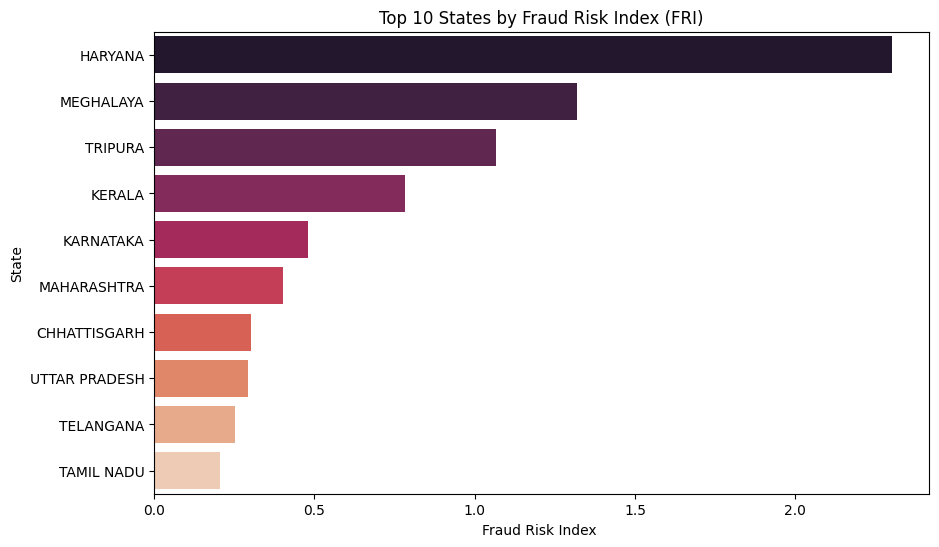

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_ranked.head(10),
    x="Fraud_Risk_Index",
    y="State",
    palette="rocket"
)

plt.title("Top 10 States by Fraud Risk Index (FRI)")
plt.xlabel("Fraud Risk Index ") # (Higher = Higher Risk)
plt.ylabel("State")
plt.show()


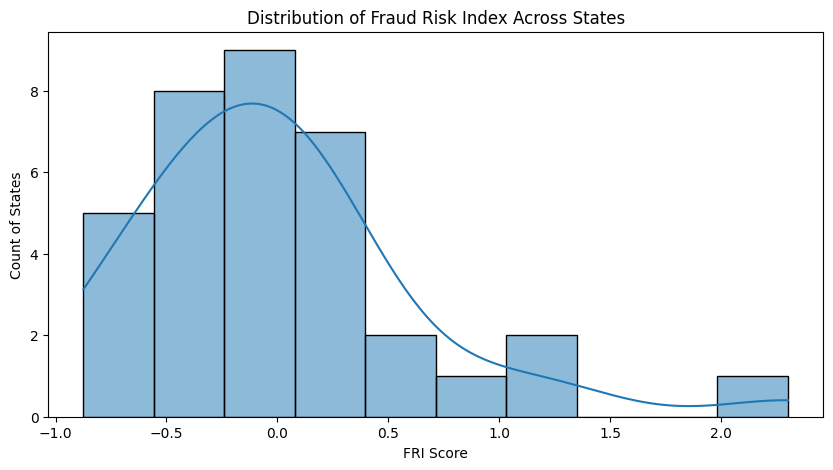

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(df_ranked["Fraud_Risk_Index"], kde=True, bins=10)
plt.title("Distribution of Fraud Risk Index Across States")
plt.xlabel("FRI Score")
plt.ylabel("Count of States")
plt.show()


### **INISGHTS**

1.
Most states cluster around FRI = −0.5 to +0.3

- This shows that most states have moderate to low fraud risk.
- There is no widespread high-risk.

2.
You can see 2–3 states with very high FRI (>1.0).
These correspond to:

- Haryana
- Meghalaya
- Tripura

These are your high-risk “outliers”.

3. 
The distribution is right-skewed (long tail on its right side)

- Meaning: Very few states show extreme fraud risk

In [46]:
# Add Risk Groups using quantiles (Low, Medium, High)
df_ranked["Risk_Group"] = pd.qcut(
    df_ranked["Fraud_Risk_Index"],
    q=3,  # 3 groups: low / medium / high
    labels=["Low Risk", "Medium Risk", "High Risk"]
)
df_ranked


,State,Loss_per_Capita_z,Loss_to_GSDP_z,Loss_per_Branch_z,Volatility_z,CAGR_z,Fraud_Risk_Index,Risk_Group
0,HARYANA,3.061688,4.033540,4.734037,-0.314445,-0.003941,2.302176,High Risk
1,MEGHALAYA,1.344085,-0.580639,-0.018864,5.274116,0.574779,1.318695,High Risk
2,TRIPURA,1.722858,-0.735462,1.422889,-0.525991,3.440807,1.065020,High Risk
3,KERALA,2.222535,0.187876,0.692821,0.765421,0.044569,0.782645,High Risk
4,KARNATAKA,0.275643,-0.177672,0.951749,0.101293,1.250716,0.480346,High Risk
5,MAHARASHTRA,-0.016811,0.578500,1.368614,-0.215611,0.287173,0.400373,High Risk
6,CHHATTISGARH,-0.340660,2.247368,-0.171201,0.252801,-0.485413,0.300579,High Risk
7,UTTAR PRADESH,-0.167156,0.791835,0.208955,-0.248834,0.872240,0.291408,High Risk
8,TELANGANA,-0.628274,0.919997,0.432243,-0.160380,0.690573,0.250832,High Risk
9,TAMIL NADU,0.594580,0.045274,1.045124,-0.337061,-0.322115,0.205160,High Risk


In [52]:
df_fri = df_ranked[["State", "Fraud_Risk_Index", "Risk_Group"]].copy()

# Clean State text (important for Tableau join)
df_fri["State"] = df_fri["State"].astype(str).str.strip()

df_fri.to_csv("../data/fraud_risk_index.csv", index=False)

print("Saved clean fraud_risk_index.csv with:")
print(df_fri.head())

Saved clean fraud_risk_index.csv with:
       State  Fraud_Risk_Index Risk_Group
0    HARYANA          2.302176  High Risk
1  MEGHALAYA          1.318695  High Risk
2    TRIPURA          1.065020  High Risk
3     KERALA          0.782645  High Risk
4  KARNATAKA          0.480346  High Risk


-------------------------------------------

---------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------

## **Clustering Into 3-Risk Groups**

In [35]:
df_scaled["Risk_Group"] = pd.qcut(
    df_scaled["Fraud_Risk_Index"],
    q=3,
    labels=["Low Risk", "Medium Risk", "High Risk"]
)

df_scaled.head()

,State,Loss_per_Capita_z,Loss_to_GSDP_z,Loss_per_Branch_z,Volatility_z,CAGR_z,Fraud_Risk_Index,Risk_Group
0,ANDAMAN AND NICOBAR ISLANDS,-0.413302,-0.735462,-0.274483,-0.404994,-1.796544,-0.724957,Low Risk
1,ANDHRA PRADESH,-0.701056,0.177794,-0.483549,0.966234,0.826855,0.157256,High Risk
2,ARUNACHAL PRADESH,-0.729336,-0.735462,-0.378793,-0.525991,0.200853,-0.433746,Low Risk
3,ASSAM,0.282080,-0.547108,-0.059780,-0.127958,-0.502123,-0.190978,Medium Risk
4,BIHAR,-0.601811,-0.155500,-0.555709,-0.320757,0.272451,-0.272265,Low Risk


C:\Users\KRISTINE\AppData\Local\Temp\ipykernel_23296\1304515470.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Risk Group")


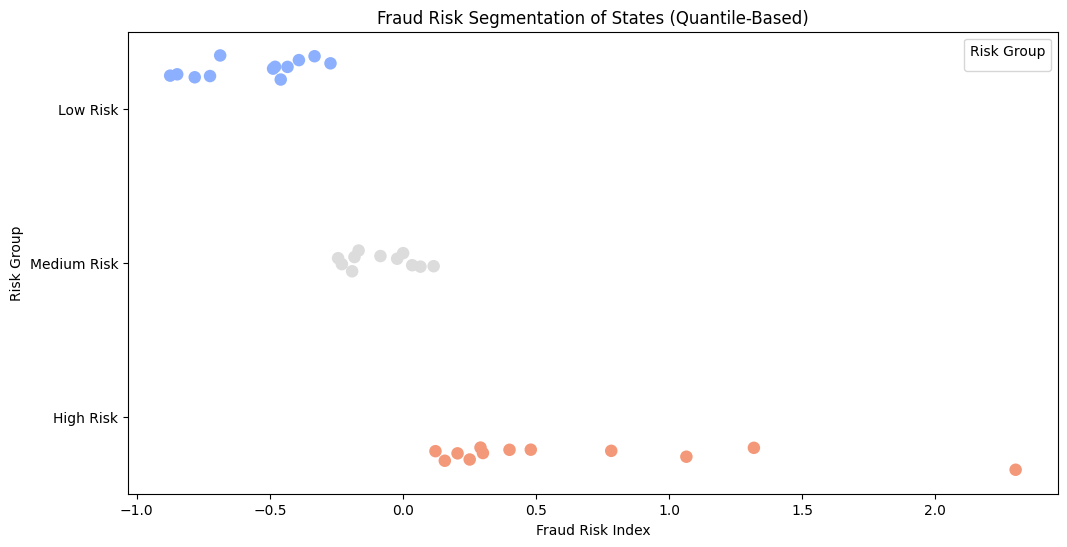

In [37]:
plt.figure(figsize=(12,6))
sns.stripplot(
    data=df_scaled.sort_values("Fraud_Risk_Index"),
    x="Fraud_Risk_Index",
    y="Risk_Group",
    hue="Risk_Group",
    palette="coolwarm",
    jitter=0.25,
    size=9,
    dodge=True
)
plt.title("Fraud Risk Segmentation of States (Quantile-Based)")
plt.xlabel("Fraud Risk Index")
plt.ylabel("Risk Group")
plt.legend(title="Risk Group")
plt.show()


Using features for PCA: ['Loss_per_Capita_z', 'Loss_to_GSDP_z', 'Loss_per_Branch_z', 'Volatility_z', 'CAGR_z']


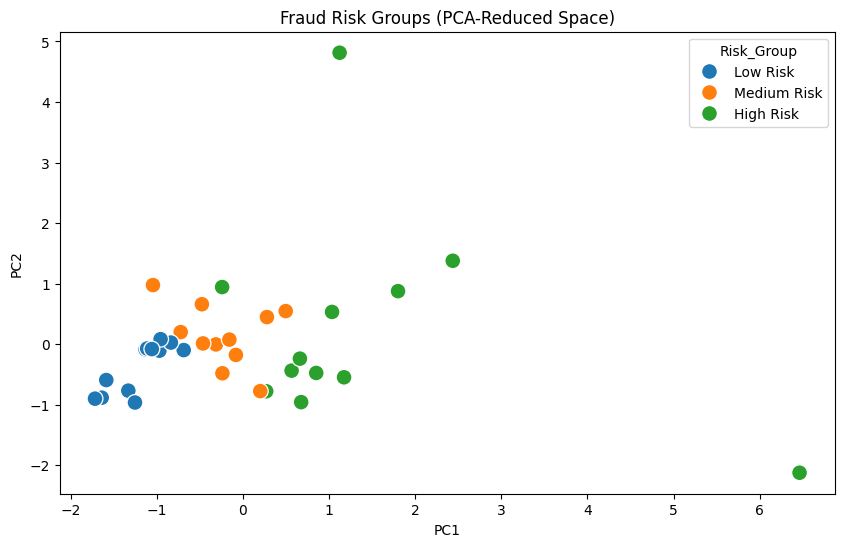

In [40]:
from sklearn.decomposition import PCA

# 1) pick the feature columns you used for FRI (the z-score ones)
feature_cols = [c for c in df_scaled.columns if c.endswith("_z")]
print("Using features for PCA:", feature_cols)

# 2) run PCA on those features
pca = PCA(n_components=2)
p = pca.fit_transform(df_scaled[feature_cols])

# 3) store PC1, PC2 in the same df_scaled
df_scaled["PC1"] = p[:, 0]
df_scaled["PC2"] = p[:, 1]

# 4) scatter plot colored by Risk_Group
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_scaled,
    x="PC1",
    y="PC2",
    hue="Risk_Group",
    s=130
)
plt.title("Fraud Risk Groups (PCA-Reduced Space)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [42]:
# Create lists per category
high = df_scaled[df_scaled["Risk_Group"] == "High Risk"]["State"].tolist()
medium = df_scaled[df_scaled["Risk_Group"] == "Medium Risk"]["State"].tolist()
low = df_scaled[df_scaled["Risk_Group"] == "Low Risk"]["State"].tolist()

# Normalize lengths (so the table aligns)
max_len = max(len(high), len(medium), len(low))
high += [""] * (max_len - len(high))
medium += [""] * (max_len - len(medium))
low += [""] * (max_len - len(low))

risk_summary = pd.DataFrame({
    "High Risk States": high,
    "Medium Risk States": medium,
    "Low Risk States": low
})

risk_summary


,High Risk States,Medium Risk States,Low Risk States
0,ANDHRA PRADESH,ASSAM,ANDAMAN AND NICOBAR ISLANDS
1,CHHATTISGARH,CHANDIGARH,ARUNACHAL PRADESH
2,HARYANA,DADRA AND NAGAR HAVELI AND DAMAN AND DIU,BIHAR
3,KARNATAKA,GUJARAT,GOA
4,KERALA,HIMACHAL PRADESH,LADAKH
5,MAHARASHTRA,JAMMU AND KASHMIR,MADHYA PRADESH
6,MEGHALAYA,JHARKHAND,MANIPUR
7,DELHI,ODISHA,MIZORAM
8,TAMIL NADU,PUNJAB,NAGALAND
9,TELANGANA,RAJASTHAN,PUDUCHERRY


In [47]:
# Sort by risk group (High → Medium → Low)
order = ["High Risk", "Medium Risk", "Low Risk"]

risk_table = (
    df_scaled[["State", "Fraud_Risk_Index", "Risk_Group"]]
    .sort_values(by=["Risk_Group", "Fraud_Risk_Index"], ascending=[True, False])
)

# Apply categorical ordering
risk_table["Risk_Group"] = pd.Categorical(risk_table["Risk_Group"], categories=order, ordered=True)

risk_table = risk_table.sort_values(["Risk_Group", "Fraud_Risk_Index"], ascending=[True, False])

risk_table.reset_index(drop=True, inplace=True)

risk_table


,State,Fraud_Risk_Index,Risk_Group
0,HARYANA,2.302176,High Risk
1,MEGHALAYA,1.318695,High Risk
2,TRIPURA,1.065020,High Risk
3,KERALA,0.782645,High Risk
4,KARNATAKA,0.480346,High Risk
5,MAHARASHTRA,0.400373,High Risk
6,CHHATTISGARH,0.300579,High Risk
7,UTTAR PRADESH,0.291408,High Risk
8,TELANGANA,0.250832,High Risk
9,TAMIL NADU,0.205160,High Risk


In [ ]:
df